In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
all_digits = pd.read_csv("digit_matrices.csv")
# przetasowanie
all_digits = all_digits.sample(frac=1).reset_index(drop=True)
digits = pd.DataFrame()

In [4]:
# Wybór po 30 rekordów z każdej cyfry
for i in range(10):    
    digits = digits.append(all_digits.loc[all_digits["Digit"] == i][:30])

In [5]:
digits

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,Digit
1,0,0,0,12,11,0,0,0,0,0,...,0,0,0,0,11,13,16,2,0,0
31,0,0,0,14,12,2,0,0,0,0,...,0,0,0,1,11,14,7,0,0,0
39,0,0,3,11,7,1,0,0,0,0,...,0,0,0,4,15,15,4,0,0,0
44,0,0,5,13,13,5,0,0,0,0,...,0,0,0,5,14,15,9,0,0,0
46,0,0,9,16,11,0,0,0,0,1,...,0,0,0,9,16,16,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,9,13,14,5,0,0,0,4,...,0,0,0,7,15,16,9,0,0,9
279,0,0,8,16,13,2,0,0,0,2,...,0,0,0,8,15,16,15,1,0,9
290,0,0,8,16,11,1,0,0,0,0,...,0,0,0,9,16,16,16,12,0,9
294,0,0,7,14,10,0,0,0,0,7,...,0,0,0,5,13,16,14,6,0,9


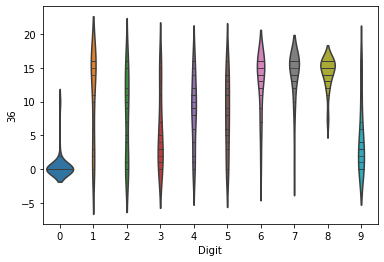

In [6]:
g1=sns.violinplot(y="36",x="Digit",data=digits, inner='stick')

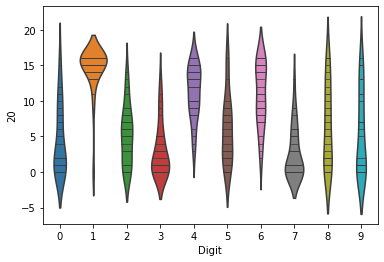

In [7]:
g1=sns.violinplot(y="20",x="Digit",data=digits, inner='stick')

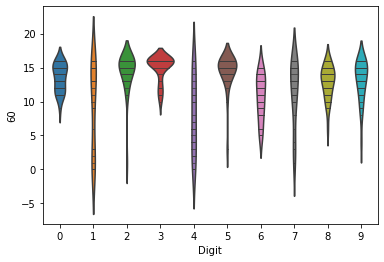

In [8]:
g1=sns.violinplot(y="60",x="Digit",data=digits, inner='stick')

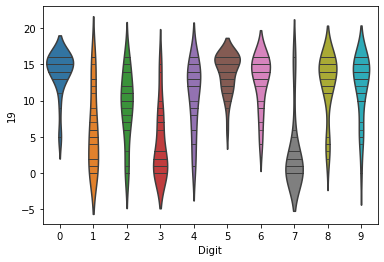

In [9]:
g1=sns.violinplot(y="19",x="Digit",data=digits, inner='stick')

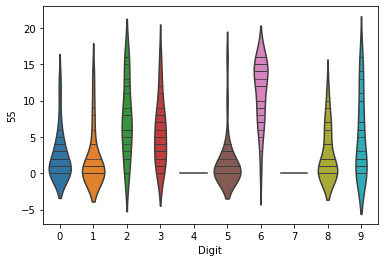

In [10]:
g1=sns.violinplot(y="55",x="Digit",data=digits, inner='stick')

In [11]:
class DataProcessing:
    @staticmethod
    def shuffle(X):
        return X.sample(frac=1).reset_index(drop=True)

    #podział zbioru
    @staticmethod
    def splitSet(X):
        split = int(len(X)*0.7)
        training_set = X[:split] 
        validation_set =X[split:]
        return [training_set, validation_set]

In [12]:
class KNN:
    @staticmethod
    def minkowskiMetric(v1, v2, m):
        distance = 0
        for i in range(len(v1)-1):
            distance += abs(v1.iloc[i] - v2.iloc[i])**m
        distance = distance**(1/m)
        return distance
    
    def clustering(sample, X, k, m=2):
        distances = []
        classes = {i:0 for i in range(10)}
        # obliczanie odleglosci miedzy probkami
        for record in X.iloc:
            distances.append([KNN.minkowskiMetric(sample, record, m), record.Digit])
        
        # sortowanie
        distances = sorted(distances)                    
        # glosowanie
        for i in range(k):
            classes[distances[i][1]]+=1
        # zwrocenie wyniku
        return max(classes, key=classes.get)

In [13]:
training_set, validation_set = DataProcessing.splitSet(DataProcessing.shuffle(digits))

In [14]:
#training_set, validation_set = DataProcessing.splitSet(DataProcessing.shuffle(all_digits))

In [15]:
def test(training_set, validation_set, k=4, m=2):
    good_answers = 0
    statistics = {i: {'all': 0, 'good': 0} for i in range(10)}
    for sample in validation_set.iloc:
        digit = sample.Digit
        statistics[digit]['all'] += 1
        answer = KNN.clustering(sample, training_set, k, m)
        if answer == digit:
            good_answers += 1
            statistics[digit]['good'] += 1
        else:
            print(f"Wrong prediction. Digit: {digit}, guessed: {answer}")
    print(f"Accuracy: {100*good_answers/len(validation_set)}%")
    print_stats(statistics)
    

In [16]:
def print_stats(statistics):
    x = [i for i in statistics.keys()]
    y = []
    for i in x:
        y.append(100*statistics[i]['good'] / statistics[i]['all'])
    
    sns.set_theme()
    f, ax1 = plt.subplots(1,1, figsize=(7,5), sharex=True)
    
    fig = sns.barplot(x=x, y=y, palette='rocket', ax=ax1)
    fig.set(xlabel='Digits', ylabel='% accuracy')
    plt.show()

Wrong prediction. Digit: 8, guessed: 3
Wrong prediction. Digit: 0, guessed: 6
Wrong prediction. Digit: 9, guessed: 7
Wrong prediction. Digit: 8, guessed: 3
Wrong prediction. Digit: 9, guessed: 8
Wrong prediction. Digit: 8, guessed: 1
Accuracy: 93.33333333333333%


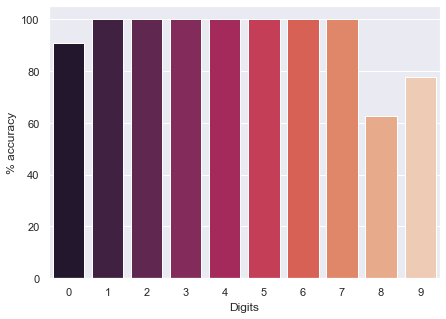

In [17]:
test(training_set, validation_set, 3, 1)